In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optionally, set style
import seaborn as sns
sns.set(style='whitegrid')


In [2]:
# 2. Load dataset
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/creditcard.csv")
print('Dataset shape:', df.shape)
print(df.head())

# Check class balance
print('Class distribution:')
print(df['Class'].value_counts())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [3]:
# 3. Prepare features and target

X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

In [4]:
# 4. Train SVM models using different kernels
kernels = {
    'Linear': SVC(kernel='linear', random_state=42),
    'RBF': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Polynomial': SVC(kernel='poly', degree=3, gamma='scale', random_state=42)
}

results = {}

for name, svm_model in kernels.items():
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f'\n{name} Kernel SVM Results:')
    print(f'Accuracy: {acc:.4f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))


Linear Kernel SVM Results:
Accuracy: 0.9993
Confusion Matrix:
[[56843    21]
 [   21    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.79      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962


RBF Kernel SVM Results:
Accuracy: 0.9994
Confusion Matrix:
[[56861     3]
 [   30    68]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Polynomial Kernel SVM Results:
Accuracy: 0.9994
Confusion Matrix:
[[56851    13]
 [   19    79]]
Classification Re

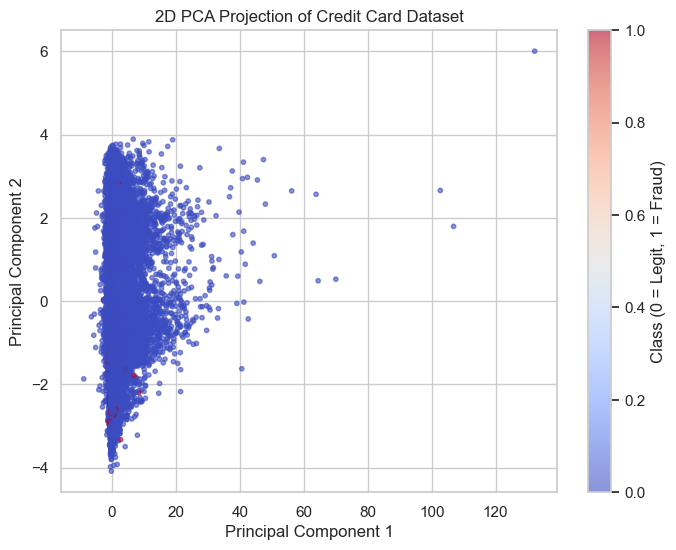

In [5]:
# 5. PCA 2D visualization of the entire dataset

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, s=10)
plt.title('2D PCA Projection of Credit Card Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Legit, 1 = Fraud)')
plt.show()

In [6]:
# 6. Summary table of kernel accuracies
results_df = pd.DataFrame(list(results.items()), columns=['SVM Kernel', 'Test Accuracy'])
print('\nModel Accuracy Comparison:')
print(results_df.sort_values(by='Test Accuracy', ascending=False))


Model Accuracy Comparison:
   SVM Kernel  Test Accuracy
2  Polynomial       0.999438
1         RBF       0.999421
0      Linear       0.999263
